<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/Question3-SentiAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("hash")
install.packages("syuzhet")
install.packages(c("httr", "jsonlite"))
install.packages("")

In [ ]:
library(dplyr) # for pipes and the data_frame function
library(rvest) # webscraping
library(stringr) # to deal with strings and to clean up our data
library(curl)
library(hash)
library(syuzhet)	
library(httr)
library(jsonlite)

In [31]:
data <- read.csv('pubmed_results.csv')
years <- c(2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012)
yearwise_data = list()
for (year in years)
{
  datalist = list()
  title_by_year <- data[data$year == year,'title']
  i <- 1
  for (title in title_by_year)
  {
    szu_score <- get_sentiment(title,	method="syuzhet")
    afinn_score <- get_sentiment(title,	method="afinn")
    bing_score <- get_sentiment(title,	method="bing")
    nrc_score <- get_sentiment(title,	method="nrc")
    dat <- data.frame("szu_score"=szu_score,"afinn_score"=afinn_score,"bing_score"=bing_score,"nrc_score"=nrc_score)
    datalist[[i]] <- dat # add it to your list
    i <- i + 1
  }
  tmp <- do.call(rbind, datalist)
  tmp$szu_score <- as.numeric(tmp$szu_score)
  tmp$afinn_score <- as.numeric(tmp$afinn_score)
  tmp$bing_score <- as.numeric(tmp$bing_score)
  tmp$nrc_score <- as.numeric(tmp$nrc_score)
  yearwise_data[[year]] <- data.frame("szu_score"=mean(tmp$szu_score),"afinn_score"=mean(tmp$afinn_score),"bing_score"=mean(tmp$bing_score),"nrc_score"=mean(tmp$nrc_score))  
}
all_years <- do.call(rbind, yearwise_data)
all_years

szu_score,afinn_score,bing_score,nrc_score
<dbl>,<dbl>,<dbl>,<dbl>
0.43031915,0.54255319,-0.01063830,0.47872340
0.01084337,-0.06024096,-0.08433735,-0.09638554
0.10104167,-0.12500000,-0.20833333,0.29166667
-0.03725490,-0.13725490,-0.11764706,0.01960784
0.58333333,-0.88888889,0.88888889,0.88888889
-0.03678161,-0.06513410,-0.25287356,0.06513410
-0.12418033,-0.22131148,-0.31147541,-0.11475410
-0.25370370,-0.34259259,-0.35185185,-0.25925926
-0.17678571,-0.45982143,-0.28125000,-0.16517857


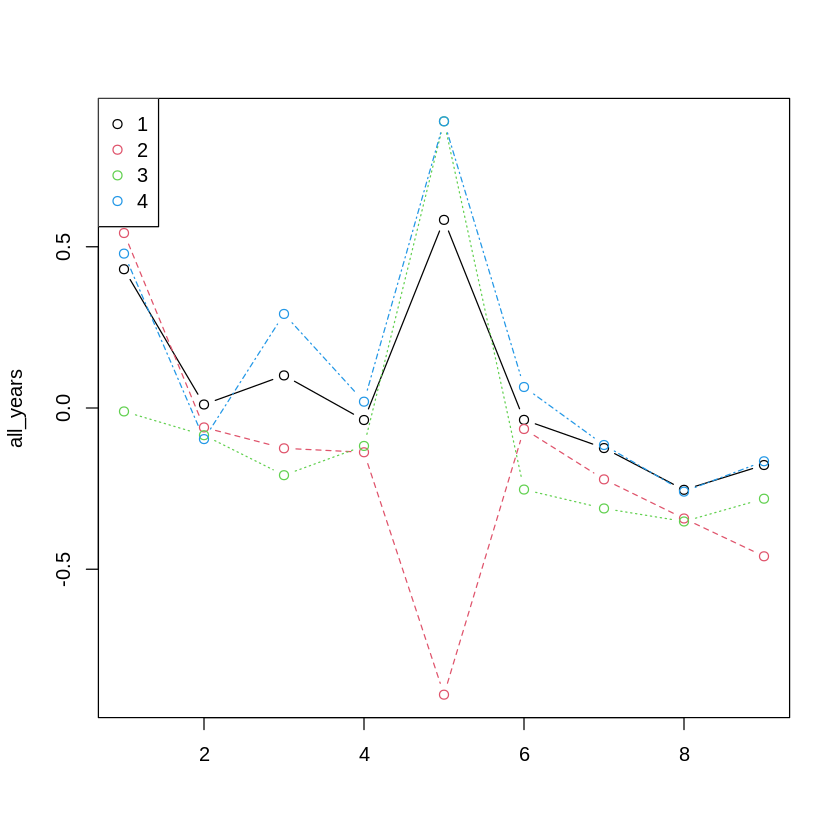

In [32]:
 
 matplot(all_years, type = c("b"),pch=1,col = 1:4) #plot
 legend("topleft", legend = 1:4, col=1:4, pch=1) # optional legend